## Initial Setup

In [1]:
from pyspark.sql import SparkSession

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1693814926276_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
spark

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
from pyspark.sql import functions as F

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 ## <font color='red'>Task 01: Read the data </font>

<font color='red'> Ensure you read the data so that all columns are read with the right data type.
The "right" datatype at this stage are shown in the expected output cell below. </font>

<font color='red'>
    
**Sample input:** 
This task does not have an input. 

**Sample output:** 
Dataframe stored in the variable ```raw_recipes_df```.  </font>

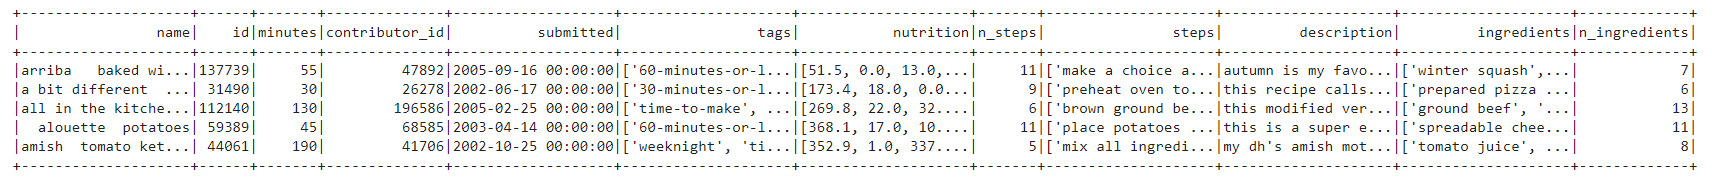

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 1 </font>

<font color='blue'>complete the code in the following cell </font>

In [18]:
# Task 01 Cell 1 out of 1

raw_recipes_df = spark.read.csv("s3://demobucketpavi/RAW_recipes_cleaned .csv",header=True,inferSchema=True)
# argument 1, Add an argument to communicate to the compiler that there is a header in the raw data.
# argument 2, Add an argument to ask the complier to estimate the data types for all columns. 
                               
raw_recipes_df.show()
# Please forward the exact name of data frames and columns as suggested in the code. 
# It will ensure that the assert commands function correctly.  

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+-------+--------------+-------------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|                name|    id|minutes|contributor_id|          submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|
+--------------------+------+-------+--------------+-------------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|arriba   baked wi...|137739|     55|         47892|2005-09-16 00:00:00|['60-minutes-or-l...|[51.5, 0.0, 13.0,...|     11|['make a choice a...|autumn is my favo...|['winter squash',...|            7|
|a bit different  ...| 31490|     30|         26278|2002-06-17 00:00:00|['30-minutes-or-l...|[173.4, 18.0, 0.0...|      9|['preheat oven to...|this recipe calls...|['prepared pizza ...|            6|


<font color='blue'>Test cases for Task 01</font>

In [19]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.count() == 231637, "There is a mistake in reading the data."
assert len(raw_recipes_df.columns) == 12, "There is a mistake in reading the data."
assert raw_recipes_df.schema["minutes"].dataType == IntegerType(), "The data types have not been read correctly."
assert raw_recipes_df.schema["tags"].dataType == StringType(), "The data types have not been read correctly."
assert raw_recipes_df.schema["n_ingredients"].dataType == IntegerType(), "The data types have not been read correctly."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 #### <font color='red'>If all test cases pass task 01 ends </font>

## Extract ```nutrition``` values 

In [20]:
# List of nutrition columns

nutrition_column_names = ['calories',
                          'total_fat_PDV',
                          'sugar_PDV',
                          'sodium_PDV',
                          'protein_PDV',
                          'saturated_fat_PDV',
                          'carbohydrates_PDV']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 ## <font color='red'>Task 02: Extract individual features from the nutrition column.

<font color='red'> 
As read by the spark compiler, the nutrition column is a string column when it should be an array of float values. Each row in the nutrition column contains seven values. Each value represents nutrition information. 
    
    
**Your task is to separate the array into seven individual columns.**
    
Write a code that takes in the nutrition column from ```raw_recipes_df``` dataframe, and extracts individual values into seven different columns named calories, total fat (PDV), sugar (PDV), sodium (PDV), protein (PDV), saturated fat (PDV), and carbohydrates (PDV).

</font>

<font color='red'>
    
### **Sample input:** 
    
The image below shows a subset of columns from the ```raw_recipes_df``` dataset. The datatype of the nutrition column is a string.
 </font>

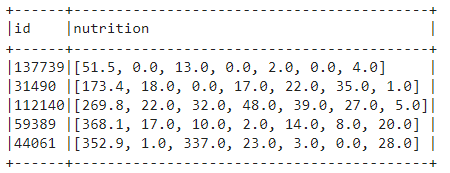

<font color='red'>
    
### **Sample Output:** 
    
The image below shows a subset of columns from the ```raw_recipes_df``` dataset after the extraction of nutrition values is completed. The datatype of the individual nutrition column is has to be float.
 </font>

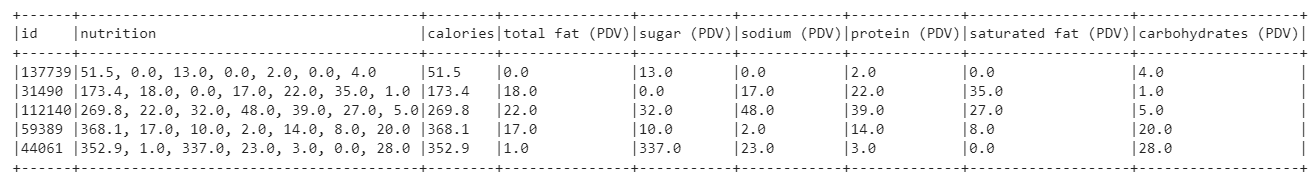

<font color='red'>

This task is further divided into two sub tasks 
    
### Task 2.1 
    
Use string operations to remove the square brackets from the nutrition column. 

Sample input: nutrition column 
    </font>

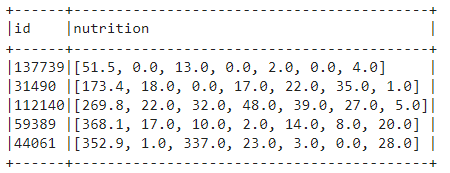

<font color='red'>


**Sample output:** 
Nutrition column without the brackets. 
    
</font>

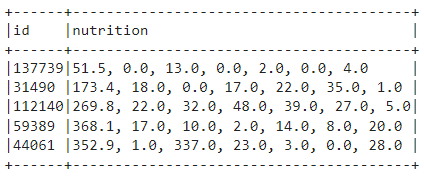

<font color='red'>

### Task 2.2 
    
Task 2.2 Split the nutrition column into seven individual columns and cast the new columns to float values. 

First split the column on using the comma delimiter. Then you can use a for loop to iterate over the column names declared in the variable ```nutrition_column_names```, inside each iteration write a code to extract the value at a specific index of the nutrition array  

**Sample input:**
Nutrition column without the brackets.
    
</font>

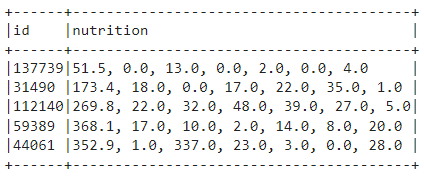

<font color='red'>

**Sample output:**
Nutrition column split into multiple 
    
</font>

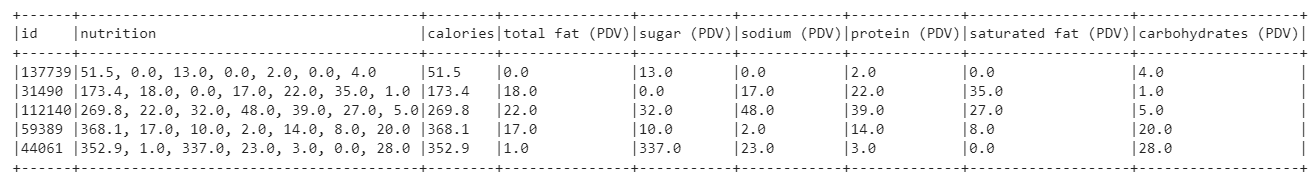

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 2 </font>

<font color='blue'>complete the code in the following cell </font>

In [21]:
# Task 02 Cell 1 out of 2
# 2.1 - string operations to remove square brakets
raw_recipes_df = raw_recipes_df.withColumn('nutrition', F.regexp_replace('nutrition', "[\[\]]",""))
raw_recipes_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+-------+--------------+-------------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|                name|    id|minutes|contributor_id|          submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|
+--------------------+------+-------+--------------+-------------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|arriba   baked wi...|137739|     55|         47892|2005-09-16 00:00:00|['60-minutes-or-l...|51.5, 0.0, 13.0, ...|     11|['make a choice a...|autumn is my favo...|['winter squash',...|            7|
|a bit different  ...| 31490|     30|         26278|2002-06-17 00:00:00|['30-minutes-or-l...|173.4, 18.0, 0.0,...|      9|['preheat oven to...|this recipe calls...|['prepared pizza ...|            6|


In [22]:
# Task 02 Cell 2 out of 3
# STEP 2.2 - split the neutrition string into seven individial values. 
# Create an object to split the nutrition column

nutrition_cols_split = F.split(raw_recipes_df['nutrition'], ',') # pyspark function to split values based on a delimiter.  

# Write a loop to extract individual values from the nutrition column

for col_index, col_name in enumerate(nutrition_column_names):
    raw_recipes_df = (raw_recipes_df.withColumn(col_name,nutrition_cols_split.getItem(col_index).cast('float')))
raw_recipes_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+-------+--------------+-------------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+--------+-------------+---------+----------+-----------+-----------------+-----------------+
|                name|    id|minutes|contributor_id|          submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|calories|total_fat_PDV|sugar_PDV|sodium_PDV|protein_PDV|saturated_fat_PDV|carbohydrates_PDV|
+--------------------+------+-------+--------------+-------------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+--------+-------------+---------+----------+-----------+-----------------+-----------------+
|arriba   baked wi...|137739|     55|         47892|2005-09-16 00:00:00|['60-minutes-or-l...|51.5, 0.0, 13.0, ...|     11|['

Hint: [Visit this page to learn more about splitting columns](https://sparkbyexamples.com/pyspark/pyspark-split-dataframe-column-into-multiple-columns/)

**Test cases for task 02**

In [23]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.schema["carbohydrates_PDV"].dataType == FloatType(), "Recheck your typecasting"
assert raw_recipes_df.collect()[123432][14] == 62.0, "The columns have not been split correctly."
assert raw_recipes_df.collect()[10000][12] == 60.400001525878906, "The columns have not been split correctly."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 #### <font color='red'>If all test cases pass task 02 ends </font>

## Make nutrition-per-100 calorie columns

By converting the nutrition values from absolute to relative terms, we ensure that portion size is not a factor in the analysis. 


Naming convention: Original column name ```total fat (PDV)```, column name after column ```total_fat_per_100_cal```

## <font color='red'>Task 03: Standardize the nutrition values </font>

<font color='red'>
The current values for nutrition columns are not on the same scale. 
Your task is to standardize the nutrition columns using calories as the base of standardization. 

Convert the nutrition from absolute values to per 100 calorie values. 
</font>

<font color='red'>
    
We will use the  ```sugar (PDV)``` column to demonstrate the calculations for standardization.  

</font>

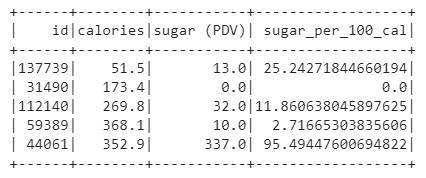

<font color='red'>
    
**Sample Calculation**

Before transformation: ```sugar (PDV)``` for recipe id 137739 = 13.0

Calories in the recipe recipe id 137739                       = 51.5

Calculation:  
sugar_per_100_cal = 13.0 * 100 / 51.5 

After transformation ```sugar_per_100_cal``` = 25.24
    
</font>

<font color='red'>

**Sample Input:** 

All nutrition columns except calories
    
</font>

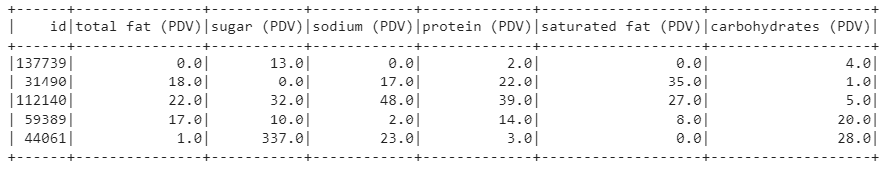

<font color='red'>

**Sample Output:** 

All nutrition columns standardized to per 100 calories 
    
</font>

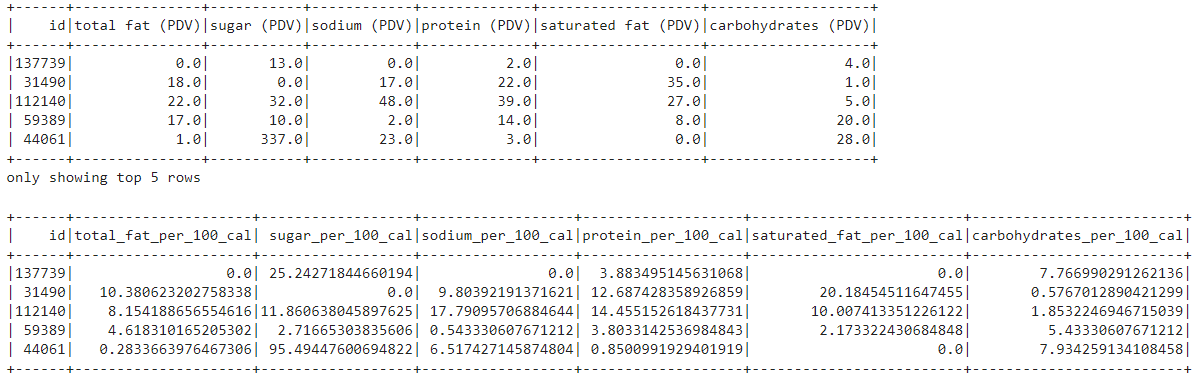

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 3 </font>

<font color='blue'>Complete the code in the following cell</font>

In [24]:
# Task 03 Cell 1 out of 1

for nutrition_col in nutrition_column_names:# loop over each of the newly created nutrition columns 
    if nutrition_col != 'calories':# the calories column should not be a part of the transformation exercise
        # following code will name the new columns 
        nutrition_per_100_cal_col = (nutrition_col
                                 .replace('_PDV','')
                                 +'_per_100_cal')
        raw_recipes_df = raw_recipes_df.withColumn(nutrition_per_100_cal_col,raw_recipes_df[nutrition_col]*100/raw_recipes_df["calories"]
                                               # pyspark code to recreate the intended transformation 
                                                 )
        
        # You might end up adding nulls to the data because of our intended transformation. 
        # Perform a fill na operation to fill all the nulls with 0s. 
        # You must limit the scope of the fill na to the current column only. 
        
    raw_recipes_df = raw_recipes_df.fillna(value=0,subset=[nutrition_per_100_cal_col])  # pyspark code to fill nulls with 0 in only the current nutrition_per_100_cal_col 
        

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Test cases for Task 03**

In [25]:
# total fat check for id 28881
assert raw_recipes_df.filter("id == 28881").select('total_fat_per_100_cal').first()[0] == 0, "total_fat_per_100_cal for recipe 28881 should be 0"

# total fat check for id 112140
assert round(raw_recipes_df.filter("id == 112140").select('total_fat_per_100_cal').first()[0]) == 8, "total_fat_per_100_cal for recipe 112140 should be 8"

# checking for nulls
for c in ['total_fat_per_100_cal','sugar_per_100_cal','sodium_per_100_cal','protein_per_100_cal',
                          'saturated_fat_per_100_cal','carbohydrates_per_100_cal']:
    assert raw_recipes_df.select(F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c)).collect()[0][0] == 0, "There are Nulls in the data"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 #### <font color='red'>If all test cases pass task 03 ends </font>

## <font color='red'>Task 04: Convert the tags column from a string to an array of strings </font>

<font color='red'>
    
Currently, the tags column is a string column but holds an array of strings. 

Your task is to convert the tags columns from a string to an array of strings. 
    
</font>

<font color='red'>

Remove ```[``` ```]``` ```'``` punctuation marks from the tags column. 
Split the tags column based on the comma delimiter. 
    

</font>

<font color='red'>

**Sample input**
    
Tags column in string datatype. 
    
</font>

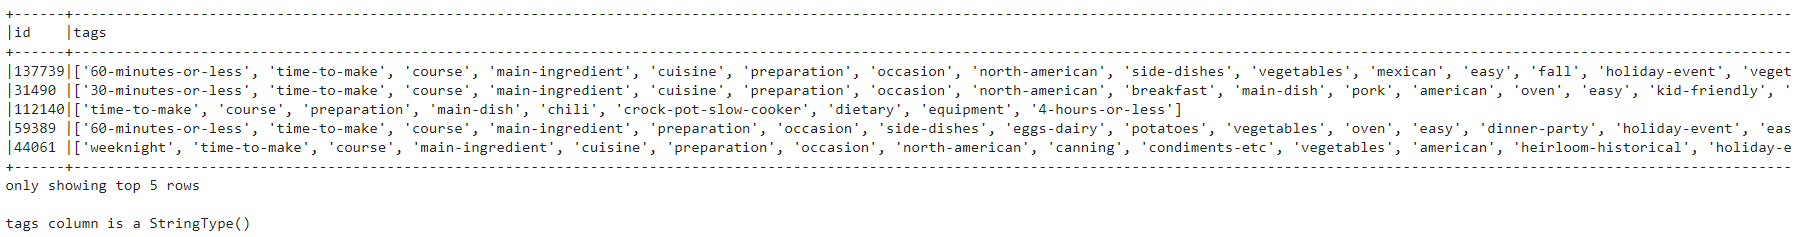

<font color='red'>

**Sample outout**
    
Tags column in array of ArrayType(StringType())  
    
</font>

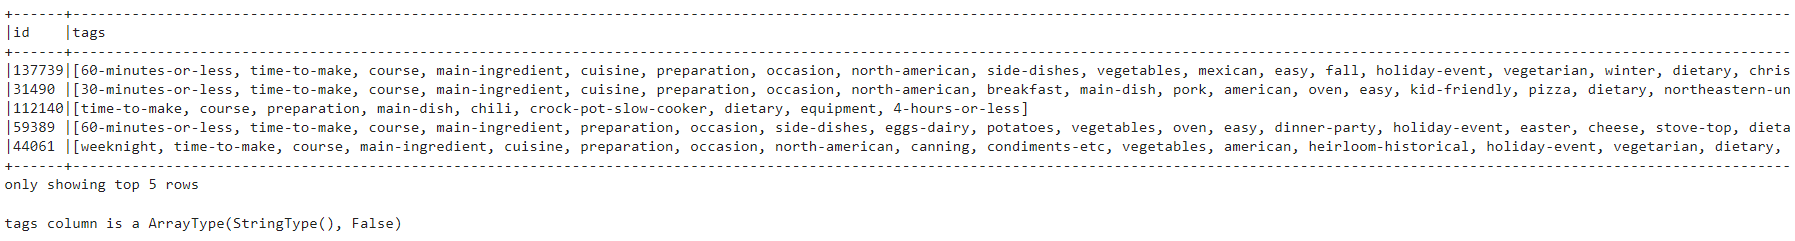

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 4 </font>

<font color='blue'>Complete the code in the following cell</font>

In [34]:
# Task 04 Cell 1 out of 1

raw_recipes_df = raw_recipes_df.withColumn('tags',(F.regexp_replace("tags","[\\[\\]\\']",""))
 # pyspark function to remove symbols like '[' ']' "'" from the strings in the tags column.
                             
                                .withColumn('tags',split(col("tags"),",").cast(ArrayType(StringType())).alias("tags")
# pyspark function to split the column using the comma delimiter.
                                           ))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
tags=raw_recipes_df['id','tags']
tags.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+--------------------+
|    id|                tags|
+------+--------------------+
|137739|[60-minutes-or-le...|
| 31490|[30-minutes-or-le...|
|112140|[time-to-make,  c...|
| 59389|[60-minutes-or-le...|
| 44061|[weeknight,  time...|
|  5289|[15-minutes-or-le...|
| 25274|[15-minutes-or-le...|
| 67888|[weeknight,  time...|
| 70971|[weeknight,  time...|
| 75452|[weeknight,  time...|
|109439|[15-minutes-or-le...|
| 42198|[weeknight,  time...|
| 67547|[weeknight,  time...|
|107517|[time-to-make,  m...|
| 39959|[15-minutes-or-le...|
| 63986|[weeknight,  time...|
| 43026|[60-minutes-or-le...|
| 23933|[15-minutes-or-le...|
|  8559|[weeknight,  time...|
| 23850|[lactose,  weekni...|
+------+--------------------+
only showing top 20 rows

**Test cases for Task 04**

In [36]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.schema["tags"].dataType == ArrayType(StringType(), True), "You have not split the string into an array."
assert raw_recipes_df.collect()[2][5] == ['time-to-make','course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less'], "Recheck your string cleaning and splitting operations."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
You have not split the string into an array.
Traceback (most recent call last):
AssertionError: You have not split the string into an array.



#### <font color='red'>If all test cases pass task 04 ends </font>

## Join Recipe Data to Review Data

In [37]:
# Reading the second data set. 
# keep this cell unedited

raw_ratings_df = (spark.read.csv("s3://demobucketpavi/RAW_interactions_cleaned.csv", 
                                 header=True, 
                                 inferSchema= True)
                  .withColumn("review_date",  F.col("date"))
                  .drop(F.col("date"))
                  )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
raw_ratings_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: integer (nullable = true)
 |-- recipe_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- review: string (nullable = true)
 |-- review_date: timestamp (nullable = true)

In [39]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_ratings_df.count() == 1132367, "There is a mistake in reading the data."
assert len(raw_ratings_df.columns) == 5, "There is a mistake in reading the data."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
raw_ratings_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+------+--------------------+-------------------+
|user_id|recipe_id|rating|              review|        review_date|
+-------+---------+------+--------------------+-------------------+
|  38094|    40893|     4|Great with a sala...|2003-02-17 00:00:00|
|1293707|    40893|     5|So simple  so del...|2011-12-21 00:00:00|
|   8937|    44394|     4|This worked very ...|2002-12-01 00:00:00|
| 126440|    85009|     5|I made the Mexica...|2010-02-27 00:00:00|
|  57222|    85009|     5|Made the cheddar ...|2011-10-01 00:00:00|
+-------+---------+------+--------------------+-------------------+
only showing top 5 rows

## <font color='red'>Task 05: Read the second data file </font>

<font color='red'>

Along with raw recipes data, we also have raw ratings data. 

The code to read the data is already written above. Your task is to join the raw ratings and raw recipes data. 

The resulting dataframe must have the same number of rows as in the raw ratings data. 
    
Join both the dataframes using the recipie IDs.
    
</font>

<font color='red'>
    
**Sample Input**
    
```raw recipes_df``` and ```raw_ratings_df```

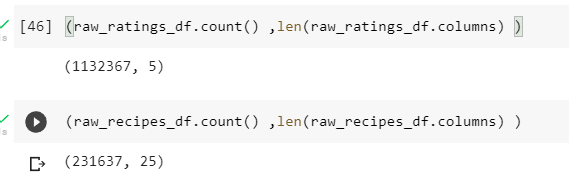

<font color='red'>

**Sample Output**

Combined dataframe with 30 columns and 1132367 rows 
    
</font>

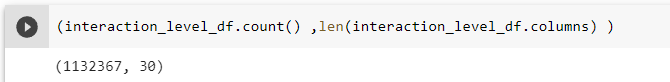

<font color='red'>

**Calculation explanation** 

There are 25 columns in the ```raw_recipes_df``` and five in the ```raw_ratings_df```. So total columns in the combined dataframe 25 + 5 = 30

The number of rows in the combined dataframe must be the same as the rows in the ```raw_ratings_df```. So total rows in combined dataframe 1132367
    
</font>

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 5 </font>

<font color='blue'>Complete the code in the following cell</font>

In [46]:
# Task 05 Cell 1 out of 1

interaction_level_df = raw_ratings_df.join(raw_recipes_df,raw_ratings_df.recipe_id==raw_recipes_df.id,"inner"                         
                                           # add the key on which the join should happen
                                           # mention the type of join expected. 
                                            )


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Test cases for Task 05**

In [47]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

(interaction_level_df.count() ,len(interaction_level_df.columns)) == (1132367, 30), "The type of join is incorrect"

list1 = raw_ratings_df.select('recipe_id').collect()
list2 = raw_recipes_df.select('id').collect()
exclusive_set = set(list1)-set(list2)

assert len(exclusive_set) == 0, "There is a mistake in reading one of the two data files."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### <font color='red'>If all test cases pass task 05 ends </font>

## <font color='red'>Task 06:  Create time-based features</font>


<font color='red'>

Currently, both the date columns, the submitted date, and the review date are in string forms. 
    
First convert the ```submitted``` and ```review_date``` to DateType()

Use review date and submission date to derive new features:
1. ```days_since_submission_on_review_date``` Number of days between the recipe submission and the current review.  
2. ```months_since_submission_on_review_date``` Number of months between the recipe submission and the current review. 
3. ```years_since_submission_on_review_date```Number of years between the recipe submission and the current review. 

</font>

<font color='red'>

**Sample input**

The following columns need to be used to calculate the time based features. 
    
</font>

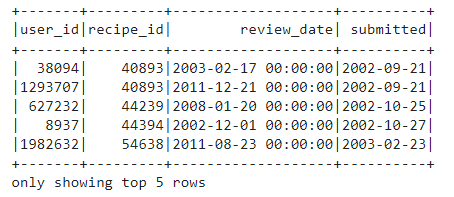

<font color='red'>

**Sample Output:**

New date based features have been added to the interactions dataframe

</font>

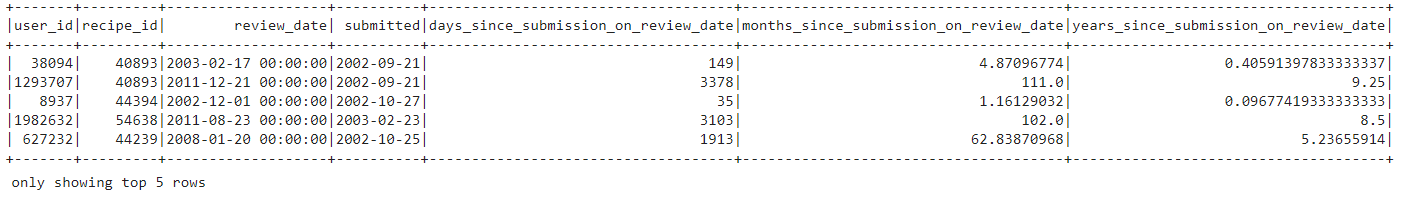

<font color='red'>

**Sample Calculation**

Recipe 40893 was submitted on 2002-09-21
User 38094 reviewed recipe 40893 on 2003-02-17

```days_since_submission_on_review_date``` number of calender days between 2002-09-21 and 2003-02-17 that is 149

```months_since_submission_on_review_date``` number of calender months between 2002-09-21 and 2003-02-17 that is 4.87 (calculated by a pyspark function)

```years_since_submission_on_review_date``` number of calender months divided by 12 that is 0.40
    
</font>

### <font color='blue'>Solution to Task 6 </font>

<font color='blue'>Complete the code in the following cell</font>

In [48]:
# Task 06 Cell 1 out of 2

interaction_level_df = (interaction_level_df
                        .withColumn('submitted',F.col("submitted").cast("date") # pyspark function to cast a column to DateType()
                                   )
                        .withColumn('review_date',F.col("review_date").cast("date") # pyspark function to cast a column to DateType()
                                   )
                                             
                       )



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
interaction_level_df = (interaction_level_df
                        .withColumn('days_since_submission_on_review_date',F.datediff("review_date","submitted")
                                     # Pyspark function to find the number of days between two dates              
                                   )
                        .withColumn('months_since_submission_on_review_date',F.months_between("review_date","submitted")
                                     # Pyspark function to find the number of months between two dates          
                                   )
                        .withColumn('years_since_submission_on_review_date',F.months_between("review_date","submitted")/12
                                     # Pyspark function to find the number of months between two dates / 12          
                                   )
                         )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Test cases for Task 06**

In [50]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert interaction_level_df.schema["days_since_submission_on_review_date"].dataType == IntegerType()

assert (interaction_level_df.filter((interaction_level_df.user_id == 428885) & (interaction_level_df.recipe_id == 335241))
                            .select('days_since_submission_on_review_date').collect()[0][0]) == 77
assert (interaction_level_df.filter((interaction_level_df.user_id == 2025676) & (interaction_level_df.recipe_id == 94265))
                            .select('months_since_submission_on_review_date').collect()[0][0]) == 153.22580645
assert (interaction_level_df.filter((interaction_level_df.user_id == 338588) & (interaction_level_df.recipe_id == 21859))
                            .select('years_since_submission_on_review_date').collect()[0][0]) == 4.564516129166667

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### <font color='red'>If all test cases pass task 06 ends</font>

## Save the data we have created so far in a parquet file. 

In [51]:
interaction_level_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: integer (nullable = true)
 |-- recipe_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- review: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- name: string (nullable = true)
 |-- minutes: integer (nullable = true)
 |-- contributor_id: integer (nullable = true)
 |-- submitted: date (nullable = true)
 |-- tags: array (nullable = true)
 |    |-- element: string (containsNull = false)
 |-- nutrition: string (nullable = true)
 |-- n_steps: integer (nullable = true)
 |-- steps: string (nullable = true)
 |-- description: string (nullable = true)
 |-- ingredients: string (nullable = true)
 |-- n_ingredients: integer (nullable = true)
 |-- calories: float (nullable = true)
 |-- total_fat_PDV: float (nullable = true)
 |-- sugar_PDV: float (nullable = true)
 |-- sodium_PDV: float (nullable = true)
 |-- protein_PDV: float (nullable = true)
 |-- saturated_fat_PDV: float (nullable = true)
 |-- carbohydrates_PDV: float (nullable = tru

In [52]:
len(interaction_level_df.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

33

In [53]:
assert (interaction_level_df.count() ,len(interaction_level_df.columns) ) == (1132367, 33)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
## Write the raw_recipes_df
## create a folder named data in you current directry before running this. 

interaction_level_df.write.mode("overwrite").parquet("s3://demobucketpavi/foodreceipe/interaction_level_df")

# interaction_level_df.write.parquet('interaction_level_df') # Modify the path as you need

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

##### <center> Notebook 1 completed </center>